# Predictions with selected data dropped out 

This notebook explores dropping outliers and using only selected columns to make predictions.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, \
                              VotingRegressor
from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC, LinearSVC
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import xgboost as xg

from pycaret.regression import *
# from pycaret.regression import RegressionExperiment

import pickle

## Read in data

In [2]:
train_df = pd.read_csv('../data/train.csv', index_col='id') #, skipinitialspace=True)
train_df.shape

(15289, 17)

In [3]:
train_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
train_df.columns = train_df.columns.str.lower()

In [5]:
train_df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
maxofuppertrange        float64
minofuppertrange        float64
averageofuppertrange    float64
maxoflowertrange        float64
minoflowertrange        float64
averageoflowertrange    float64
rainingdays             float64
averagerainingdays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [6]:
# test_df = pd.read_csv('../data/test.csv', index_col='id')
# test_df.columns = test_df.columns.str.lower()
# test_df.shape

___

## Feature Exploration / EDA

In [7]:
train_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [8]:
train_df.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
maxofuppertrange        0
minofuppertrange        0
averageofuppertrange    0
maxoflowertrange        0
minoflowertrange        0
averageoflowertrange    0
rainingdays             0
averagerainingdays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

#### clonesize

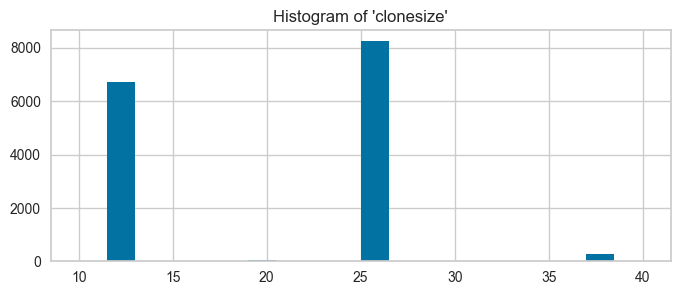

In [9]:
#histogram for general distribution visualization
plt.figure(figsize=(8,3))
plt.hist(train_df.clonesize, bins=20)
plt.title("Histogram of 'clonesize'");

In [10]:
#value counts for outlier identification
train_df.clonesize.value_counts()

25.0    8245
12.5    6717
37.5     265
20.0      56
10.0       4
40.0       2
Name: clonesize, dtype: int64

#### honeybee

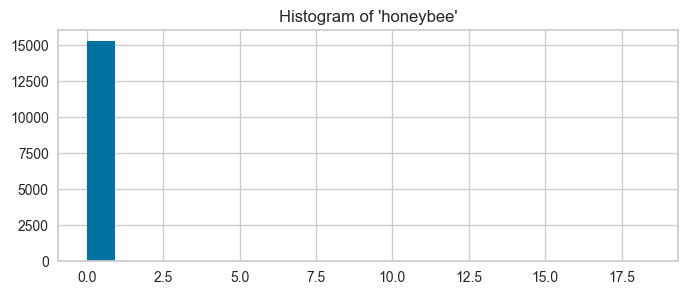

In [11]:
plt.figure(figsize=(8,3))
plt.hist(train_df.honeybee, bins=20)
plt.title("Histogram of 'honeybee'");

In [12]:
train_df.honeybee.value_counts()

0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: honeybee, dtype: int64

#### fruitset

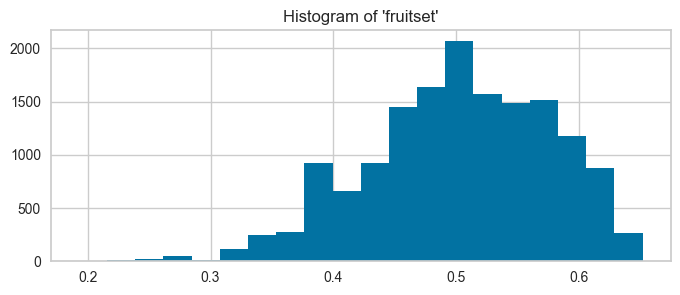

In [13]:
plt.figure(figsize=(8,3))
plt.hist(train_df.fruitset, bins=20)
plt.title("Histogram of 'fruitset'");

In [14]:
train_df.fruitset.value_counts()

0.583379    96
0.566319    81
0.534252    63
0.542170    60
0.481801    59
            ..
0.579622     1
0.456317     1
0.371190     1
0.434480     1
0.572099     1
Name: fruitset, Length: 1526, dtype: int64

In [15]:
fruitset_mask = train_df[train_df['fruitset']<0.3]
no_outliers_df = train_df.drop(index=fruitset_mask.index).copy()
no_outliers_df.shape

(15192, 17)

#### seeds

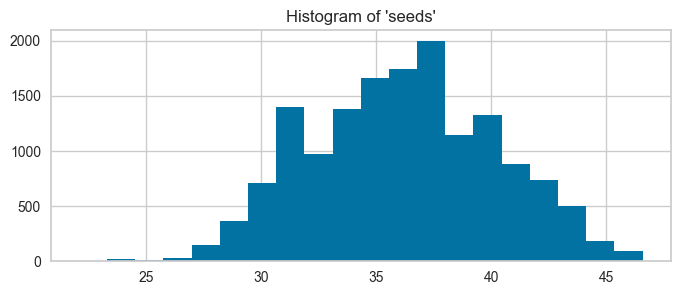

In [16]:
plt.figure(figsize=(8,3))
plt.hist(train_df.seeds, bins=20)
plt.title("Histogram of 'seeds'");

In [17]:
train_df.seeds.value_counts()

39.988734    96
37.966864    80
31.928816    71
36.976361    69
35.923314    61
             ..
43.081269     1
37.734534     1
41.843107     1
40.841356     1
27.873908     1
Name: seeds, Length: 2066, dtype: int64

In [18]:
train_df.shape

(15289, 17)

In [19]:
seeds_mask = no_outliers_df[no_outliers_df['seeds']<25]
no_outliers_df.drop(index=seeds_mask.index, inplace=True)
no_outliers_df.shape

(15187, 17)

#### rainingdays

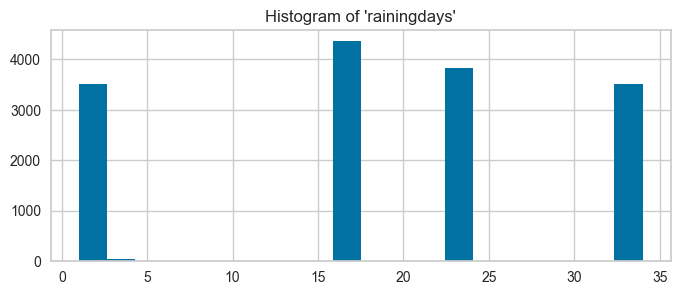

In [20]:
plt.figure(figsize=(8,3))
plt.hist(train_df.rainingdays, bins=20)
plt.title("Histogram of 'rainingdays'");

In [21]:
train_df.rainingdays.value_counts()

16.00    4361
24.00    3837
34.00    3521
1.00     3521
3.77       48
26.00       1
Name: rainingdays, dtype: int64

___

## Feature Engineering ? Drop cols?

In [22]:
train_df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'maxofuppertrange', 'minofuppertrange', 'averageofuppertrange',
       'maxoflowertrange', 'minoflowertrange', 'averageoflowertrange',
       'rainingdays', 'averagerainingdays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [23]:
cols_to_drop = ['clonesize'
                , 'honeybee'
                , 'bumbles'
                , 'andrena'
                , 'osmia'
                , 'maxofuppertrange'
                , 'minofuppertrange'
                , 'averageofuppertrange'
                , 'maxoflowertrange'
                , 'minoflowertrange'
                , 'averageoflowertrange'
                # , 'rainingdays'
                , 'averagerainingdays'
                # , 'fruitset'
                , 'fruitmass'
                # , 'seeds'
                ]

In [24]:
select_df = no_outliers_df.drop(columns=cols_to_drop)
select_df.head()

,rainingdays,fruitset,seeds,yield
id,,,,
0,24.0,0.425011,32.460887,4476.81146
1,24.0,0.444908,33.858317,5548.12201
2,24.0,0.552927,38.341781,6869.77760
3,24.0,0.565976,39.467561,6880.77590
4,24.0,0.579677,40.484512,7479.93417


___

## Model Building

In [25]:
df = select_df
# df = feature_engineer(df)
df.head()

,rainingdays,fruitset,seeds,yield
id,,,,
0,24.0,0.425011,32.460887,4476.81146
1,24.0,0.444908,33.858317,5548.12201
2,24.0,0.552927,38.341781,6869.77760
3,24.0,0.565976,39.467561,6880.77590
4,24.0,0.579677,40.484512,7479.93417


In [26]:
X = df.drop('yield', axis=1)
y = df['yield']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regressor

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7979913010564983
0.7864762777287773


### Decision Tree Regressor

In [30]:
tree = DecisionTreeRegressor(max_depth=10, min_samples_split=10, max_features=4)
# tree = DecisionTreeRegressor()

In [31]:
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.8474348793383351
0.7475708575516522


In [32]:
tree_params = {
    "max_depth": [None, 5, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "max_features": [2, 3, 4, 5, 6],
}

rs_tree = RandomizedSearchCV(tree,
                      param_distributions = tree_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_tree.fit(X_train, y_train)
rs_tree_train_score = rs_tree.score(X_train, y_train)
rs_tree_score = rs_tree.score(X_test, y_test)
print(f"Random Searched Decision Tree Score (Train): {rs_tree_train_score}")
print(f"Random Searched Decision Tree Score (Test): {rs_tree_score}")
print(f"Decision Tree Best Params: {rs_tree.best_params_}")

Random Searched Decision Tree Score (Train): 0.8109051759499918
Random Searched Decision Tree Score (Test): 0.7924880409629934
Decision Tree Best Params: {'min_samples_split': 10, 'max_features': 6, 'max_depth': 5}


### Random Forest Regressor

In [33]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_split=2, max_features=4)
# rf = RandomForestRegressor()

In [34]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9491031351913621
0.7540628523294416


In [35]:
rf_params = {
    "n_estimators": [10, 1_500, 2_000],
    "max_depth": [None, 10, 20],
    "max_samples": [0.1, 0.5]
}

gs_rf = GridSearchCV(rf,
                      param_grid = rf_params,
                      cv=5,
                      n_jobs=6)

gs_rf.fit(X_train, y_train)
gs_rf_train_score = gs_rf.score(X_train, y_train)
gs_rf_score = gs_rf.score(X_test, y_test)
print(f"Grid Searched Random Forest Score (Train): {gs_rf_train_score}")
print(f"Grid Searched Random Forest Score (Test): {gs_rf_score}")
print(f"Random Forest Best Params: {gs_rf.best_params_}")

Grid Searched Random Forest Score (Train): 0.8347882410910331
Grid Searched Random Forest Score (Test): 0.8015814678732102
Random Forest Best Params: {'max_depth': 10, 'max_samples': 0.1, 'n_estimators': 2000}


In [36]:
rs_rf = RandomizedSearchCV(rf,
                      param_distributions = rf_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=20)

rs_rf.fit(X_train, y_train)
rs_rf_train_score = rs_rf.score(X_train, y_train)
rs_rf_score = rs_rf.score(X_test, y_test)
print(f"Random Searched Random Forest Score (Train): {rs_rf_train_score}")
print(f"Random Searched Random Forest Score (Test): {rs_rf_score}")
print(f"Random Forest Best Params: {rs_rf.best_params_}")

Random Searched Random Forest Score (Train): 0.8349855945946749
Random Searched Random Forest Score (Test): 0.8016129565838421
Random Forest Best Params: {'n_estimators': 2000, 'max_samples': 0.1, 'max_depth': 10}


### Bagging Regressor

In [37]:
bag = BaggingRegressor()

In [38]:
bag.fit(X_train, y_train)
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))

0.9579488294268053
0.7450084667788273


In [39]:
bag_params = {
    # "n_estimators": [5, 10, 20],
    "max_depth": [None, 5, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    # "max_samples": [5, 10, 20, 100],
    "max_features": [1, 2, 3, 4],
}

rs_bag = RandomizedSearchCV(tree,
                      param_distributions = bag_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_bag.fit(X_train, y_train)
rs_bag_train_score = rs_bag.score(X_train, y_train)
rs_bag_score = rs_bag.score(X_test, y_test)
print(f"Random Searched Bagged Decision Tree Score (Train): {rs_bag_train_score}")
print(f"Random Searched Bagged Decision Tree Score (Test): {rs_bag_score}")
print(f"Bagged Decision Tree Best Params: {rs_bag.best_params_}")

Random Searched Bagged Decision Tree Score (Train): 0.8109051759499918
Random Searched Bagged Decision Tree Score (Test): 0.7924880409629934
Bagged Decision Tree Best Params: {'min_samples_split': 10, 'max_features': 3, 'max_depth': 5}


### AdaBoost Regressor

In [40]:
# ada = pickle.load(open('models/ada.p', 'rb'))
# ada

In [41]:
ada = AdaBoostRegressor()

In [42]:
ada.fit(X_train, y_train)
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.7321971372609819
0.7133971632615463


In [43]:
ada_params = {
    "n_estimators": [10, 20, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
}

rs_ada = RandomizedSearchCV(ada,
                      param_distributions = ada_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_ada.fit(X_train, y_train)
rs_ada_train_score = rs_ada.score(X_train, y_train)
rs_ada_score = rs_ada.score(X_test, y_test)
print(f"Random Searched Adaboost Score (Train): {rs_ada_train_score}")
print(f"Random Searched Adaboost Score (Test): {rs_ada_score}")
print(f"Adaboost Best Params: {rs_ada.best_params_}")

Random Searched Adaboost Score (Train): 0.7947534797363686
Random Searched Adaboost Score (Test): 0.78489088801586
Adaboost Best Params: {'n_estimators': 100, 'learning_rate': 0.01}


### Gradient Boosting Regressor

In [44]:
gb = GradientBoostingRegressor(learning_rate=0.05, n_estimators=500,random_state=42)
# gb = GradientBoostingRegressor()

In [45]:
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.8361993057505268
0.7873333104971342


In [46]:
gb_params = {
    "n_estimators": [10, 20, 50, 100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
}

rs_gb = RandomizedSearchCV(gb,
                      param_distributions = gb_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=20)

rs_gb.fit(X_train, y_train)
rs_gb_train_score = rs_gb.score(X_train, y_train)
rs_gb_score = rs_gb.score(X_test, y_test)
print(f"Random Searched Gradientboost Score (Train): {rs_gb_train_score}")
print(f"Random Searched Gradientboost Score (Test): {rs_gb_score}")
print(f"Gradientboost Best Params: {rs_gb.best_params_}")

Random Searched Gradientboost Score (Train): 0.8168593821545297
Random Searched Gradientboost Score (Test): 0.7993036065943061
Gradientboost Best Params: {'n_estimators': 50, 'learning_rate': 0.1}


___

### KNN Regressor

In [47]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [48]:
knn = KNeighborsRegressor(n_neighbors = 5)

In [49]:
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


0.845370081805158
0.7643077665708139


In [50]:
knn_params = {
    "n_neighbors": [5, 10, 20, 30, 40, 50],
    "weights": ['uniform', 'distance'],
}

rs_knn = RandomizedSearchCV(knn,
                      param_distributions = knn_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=20)

rs_knn.fit(X_train, y_train)
rs_knn_train_score = rs_knn.score(X_train, y_train)
rs_knn_score = rs_knn.score(X_test, y_test)
print(f"Random Searched KNN Score (Train): {rs_knn_train_score}")
print(f"Random Searched KNN Score (Test): {rs_knn_score}")
print(f"KNN Best Params: {rs_knn.best_params_}")

Random Searched KNN Score (Train): 0.7996343979487073
Random Searched KNN Score (Test): 0.7724359692204219
KNN Best Params: {'weights': 'uniform', 'n_neighbors': 20}


### XGBoost Regressor

In [51]:
xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

In [52]:
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))


0.8133972675734155
0.7774827416931254


In [53]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "gamma": [0, 0.1, 1],
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
    "n_estimators": [3, 5, 10, 20, 100, 1_000],
}

rs_xgb = RandomizedSearchCV(xgb,
                      param_distributions = xgb_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_xgb.fit(X_train, y_train)
rs_xgb_train_score = rs_knn.score(X_train, y_train)
rs_xgb_score = rs_knn.score(X_test, y_test)
print(f"Random Searched XGBoost Score (Train): {rs_xgb_train_score}")
print(f"Random Searched XGBoost Score (Test): {rs_xgb_score}")
print(f"XGBoost Best Params: {rs_xgb.best_params_}")

Random Searched XGBoost Score (Train): 0.7996343979487073
Random Searched XGBoost Score (Test): 0.7724359692204219
XGBoost Best Params: {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 1}


# Model Ensembling

___

In [54]:
vc_all_base = VotingRegressor(estimators=[('lr', lr)
                                 , ('tree', tree)
                                #  , ('rf', rf)
                                #  , ('bag', bag)
                                #  , ('ada', ada)
                                 , ('gb', gb)
                                #  , ('knn', knn)
                                 , ('xgb', xgb)
                                #  , ('rs_tree', rs_tree)
                                 , ('rs_rf', rs_rf)
                                 , ('rs_bag', rs_bag)
                                 , ('rs_ada', rs_ada)
                                #  , ('rs_gb', rs_gb)
                                 , ('rs_knn', rs_knn)
                                #  , ('rs_xgb', rs_xgb)
                                 ], n_jobs=6)

In [55]:
vc = VotingRegressor(estimators=[('lr', lr)
                                #  , ('tree', tree)
                                #  , ('rf', rf)
                                #  , ('bag', bag)
                                #  , ('ada', ada)
                                #  , ('gb', gb)
                                #  , ('knn', knn)
                                #  , ('xgb', xgb)
                                #  , ('rs_tree', rs_tree)
                                 , ('rs_rf', rs_rf)
                                #  , ('rs_bag', rs_bag)
                                #  , ('rs_ada', rs_ada)
                                 , ('rs_gb', rs_gb)
                                #  , ('rs_knn', rs_knn)
                                #  , ('rs_xgb', rs_xgb)
                                 ], n_jobs=6)

In [56]:
# "Full"
vc_all_base.fit(X_train, y_train)
print(vc_all_base.score(X_train, y_train))
print(vc_all_base.score(X_test, y_test))

0.8303783781012433
0.7981307615887197


In [57]:
# select models only
vc.fit(X_train, y_train)
print(vc.score(X_train, y_train))
print(vc.score(X_test, y_test))

0.8205130115370595
0.8002892909548711


# Scores Summary

In [58]:
print("==============================================")
print(f"Linear regression Training score: {lr.score(X_train, y_train)}")
print(f"Linear regression Testing score: {lr.score(X_test, y_test)}")
print("==============================================")
print(f"Decision Tree regressor Training score: {tree.score(X_train, y_train)}")
print(f"Decision Tree regressor Testing score: {tree.score(X_test, y_test)}")
print(f"Random Searched Decision Tree Score (Train): {rs_tree_train_score}")
print(f"Random Searched Decision Tree Score (Test): {rs_tree_score}")
print("==============================================")
print(f"Random Forest regression Training score: {rf.score(X_train, y_train)}")
print(f"Random Forest regression Testing score: {rf.score(X_test, y_test)}")
print(f"Random Searched Random Forest Score (Train): {rs_rf_train_score}")
print(f"Random Searched Random Forest Score (Test): {rs_rf_score}")
print("==============================================")
print(f"Bagging regressor Training score: {bag.score(X_train, y_train)}")
print(f"Bagging regressor Testing score: {bag.score(X_test, y_test)}")
print(f"Random Searched Bagged Decision Tree Score (Train): {rs_bag_train_score}")
print(f"Random Searched Bagged Decision Tree Score (Test): {rs_bag_score}")
print("==============================================")
print(f"Adaboost regressor Training score: {ada.score(X_train, y_train)}")
print(f"Adaboost regressor Testing score: {ada.score(X_test, y_test)}")
print(f"Random Searched Adaboost Score (Train): {rs_ada_train_score}")
print(f"Random Searched Adaboost Score (Test): {rs_ada_score}")
print("==============================================")
print(f"GradientBoost regressor Training score: {gb.score(X_train, y_train)}")
print(f"GradientBoost Tree regressor Testing score: {gb.score(X_test, y_test)}")
print(f"Random Searched Gradientboost Score (Train): {rs_gb_train_score}")
print(f"Random Searched Gradientboost Score (Test): {rs_gb_score}")
print("==============================================")
print(f"KNN regressor Training score: {knn.score(X_train, y_train)}")
print(f"KNN Tree regressor Testing score: {knn.score(X_test, y_test)}")
print(f"Random Searched KNN Score (Train): {rs_knn_train_score}")
print(f"Random Searched KNN Score (Test): {rs_knn_score}")
print("==============================================")
print(f"XGBoost Training score: {xgb.score(X_train, y_train)}")
print(f"XGBoost Testing score: {xgb.score(X_test, y_test)}")
print(f"Random Searched XGBoost Score (Train): {rs_xgb_train_score}")
print(f"Random Searched XGBoost Score (Test): {rs_xgb_score}")
print("==============================================")
print(f"Ensembled Training score: {vc.score(X_train, y_train)}")
print(f"Ensembled Testing score: {vc.score(X_test, y_test)}")

Linear regression Training score: 0.7979913010564983
Linear regression Testing score: 0.7864762777287773
Decision Tree regressor Training score: 0.8474348793383351
Decision Tree regressor Testing score: 0.7475708575516522
Random Searched Decision Tree Score (Train): 0.8109051759499918
Random Searched Decision Tree Score (Test): 0.7924880409629934
Random Forest regression Training score: 0.9491031351913621
Random Forest regression Testing score: 0.7540628523294416
Random Searched Random Forest Score (Train): 0.8349855945946749
Random Searched Random Forest Score (Test): 0.8016129565838421
Bagging regressor Training score: 0.9579488294268053
Bagging regressor Testing score: 0.7450084667788273
Random Searched Bagged Decision Tree Score (Train): 0.8109051759499918
Random Searched Bagged Decision Tree Score (Test): 0.7924880409629934
Adaboost regressor Training score: 0.7321971372609819
Adaboost regressor Testing score: 0.7133971632615463
Random Searched Adaboost Score (Train): 0.7947534797

#### PyCaret

In [59]:
# import pycaret
# pycaret.__version__

In [60]:
# from pycaret.regression import *
s = setup(select_df, target = 'yield', session_id = 123)

In [61]:
exp = RegressionExperiment()

In [62]:
# init setup on exp
exp.setup(select_df, target = 'yield', session_id = 123)

,Description,Value
0,Session id,123
1,Target,yield
2,Target type,Regression
3,Original data shape,"(15187, 4)"
4,Transformed data shape,"(15187, 4)"
5,Transformed train set shape,"(10630, 4)"
6,Transformed test set shape,"(4557, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [63]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:52:20
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [64]:
results = pull()
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,368.3509,3.377044e+05,580.3604,0.8039,0.1037,0.0644,0.038
lightgbm,Light Gradient Boosting Machine,370.3280,3.427678e+05,584.6726,0.8009,0.1047,0.0649,0.125
catboost,CatBoost Regressor,371.7146,3.504394e+05,591.1442,0.7965,0.1063,0.0653,0.099
br,Bayesian Ridge,384.6260,3.555843e+05,595.6902,0.7935,0.1061,0.0676,0.032
lr,Linear Regression,384.5947,3.555834e+05,595.6893,0.7935,0.1061,0.0676,0.583
lar,Least Angle Regression,384.5945,3.555834e+05,595.6893,0.7935,0.1061,0.0676,0.027
ridge,Ridge Regression,387.7758,3.567871e+05,596.7148,0.7928,0.1067,0.0685,0.029
lasso,Lasso Regression,388.1784,3.570497e+05,596.9352,0.7926,0.1068,0.0686,0.222
llar,Lasso Least Angle Regression,388.1873,3.570555e+05,596.9401,0.7926,0.1068,0.0686,0.027
huber,Huber Regressor,378.7398,3.590413e+05,598.5603,0.7914,0.1057,0.0657,0.034


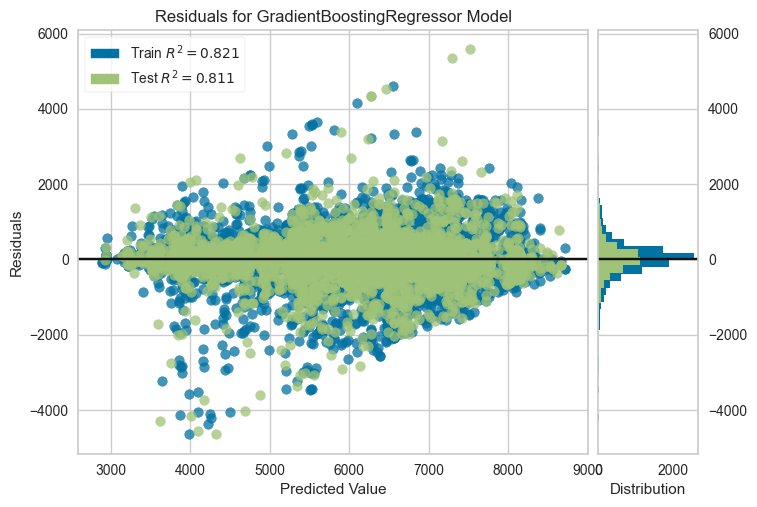

In [65]:
# plot residuals
plot_model(best, plot = 'residuals')

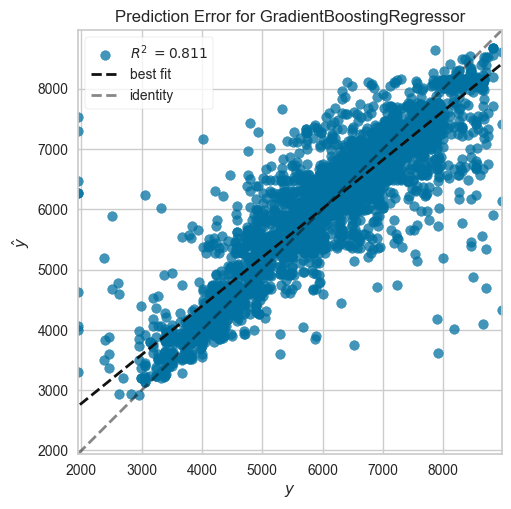

In [66]:
# plot error
plot_model(best, plot = 'error')

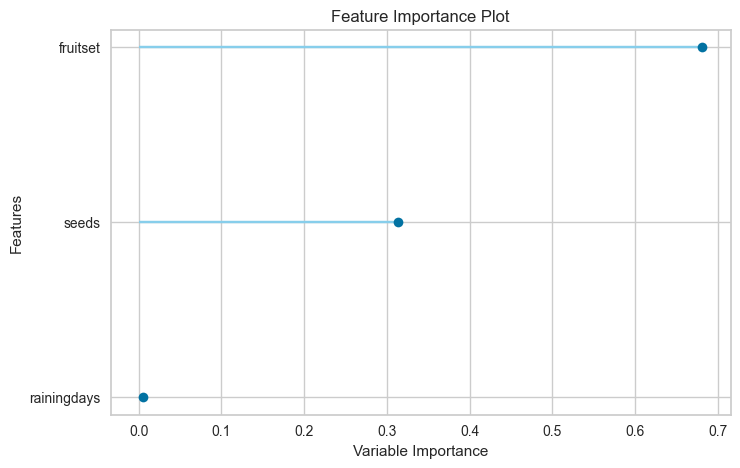

In [67]:
# plot feature importance
plot_model(best, plot = 'feature')

In [68]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,353.7861,324744.8366,569.8639,0.8109,0.1045,0.0633


In [69]:
# show predictions df
holdout_pred.head()

,rainingdays,fruitset,seeds,yield,prediction_label
id,,,,,
10519,1.0,0.454737,34.701435,5492.816895,5514.717295
10908,24.0,0.498730,35.118076,6620.098633,5815.505574
6387,24.0,0.566720,38.774788,6998.378906,6719.621264
4714,16.0,0.473689,34.304123,5535.056641,5587.621157
12578,1.0,0.490321,35.473526,5501.877930,5984.798383


In [70]:
# copy data and drop yield

new_data = select_df.copy()
new_data.drop('yield', axis=1, inplace=True)
new_data.head()

,rainingdays,fruitset,seeds
id,,,
0,24.0,0.425011,32.460887
1,24.0,0.444908,33.858317
2,24.0,0.552927,38.341781
3,24.0,0.565976,39.467561
4,24.0,0.579677,40.484512


In [71]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,rainingdays,fruitset,seeds,prediction_label
id,,,,
0,24.0,0.425011,32.460888,4619.736087
1,24.0,0.444908,33.858318,4958.370901
2,24.0,0.552927,38.341782,6703.717937
3,24.0,0.565977,39.467560,6930.492804
4,24.0,0.579677,40.484512,7200.723226


In [83]:
# save pipeline
save_model(best, 'blueberries_pycaret_no_outliers')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\panda\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['rainingdays', 'fruitset',
                                              'seeds'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', GradientBoostingRegressor(random_state=123))]),
 'blueberries_pycaret_no_outliers.pkl')

In [84]:
# load pipeline
loaded_best_pipeline = load_model('blueberries_pycaret_no_outliers')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\panda\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['rainingdays', 'fruitset',
                                             'seeds'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

___

## Creating Predictions

___

#### Re-fit to full Training dataset (no Train-Test-Split)

In [85]:
vc.fit(X, y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rs_rf',
                             RandomizedSearchCV(cv=5,
                                                estimator=RandomForestRegressor(max_depth=20,
                                                                                max_features=4,
                                                                                n_estimators=10),
                                                n_iter=20, n_jobs=6,
                                                param_distributions={'max_depth': [None,
                                                                                   10,
                                                                                   20],
                                                                     'max_samples': [0.1,
                                                                                     0.5],
                                                                     'n_estimators': [10,
                                                                                      1500,
                                                                                      2000]})),
                            ('rs_gb',
                             RandomizedSearchCV(cv=5,
                                                estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                                                    n_estimators=500,
                                                                                    random_state=42),
                                                n_iter=20, n_jobs=6,
                                                param_distributions={'learning_rate': [0.01,
                                                                                       0.05,
                                                                                       0.1,
                                                                                       0.5,
                                                                                       1],
                                                                     'n_estimators': [10,
                                                                                      20,
                                                                                      50,
                                                                                      100,
                                                                                      200,
                                                                                      300,
                                                                                      400]}))],
                n_jobs=6)

In [86]:
vc.score(X, y)

0.8184773722657718

#### Testing

In [87]:
contest_data = pd.read_csv('../data/test.csv', index_col='id')
contest_data.columns = contest_data.columns.str.lower()
contest_data.drop(columns=cols_to_drop, inplace=True)
contest_data.head()

,rainingdays,fruitset,seeds
id,,,
15289,24.0,0.399367,31.394569
15290,1.0,0.488048,36.846956
15291,16.0,0.583379,40.037644
15292,16.0,0.433014,33.116091
15293,24.0,0.360996,29.558019


#### Predict on contest data (My ensembled model)

In [88]:
contest_submission_ensemble = pd.DataFrame(vc.predict(contest_data), columns=['yield'])
contest_submission_ensemble.index = contest_data.index
contest_submission_ensemble.head()

,yield
id,
15289,4350.919994
15290,6151.937428
15291,7239.177927
15292,4827.403219
15293,3839.357054


In [89]:
pd.DataFrame(contest_submission_ensemble).to_csv('../data/contest_submission_ensemble_no_outliers.csv', index=True)

#### Predict on contest data (PyCaret)

In [90]:
predictions_contest = predict_model(best, data = contest_data)
predictions_contest.head()

,rainingdays,fruitset,seeds,prediction_label
id,,,,
15289,24.0,0.399367,31.394569,4270.621302
15290,1.0,0.488048,36.846958,6184.132791
15291,16.0,0.583379,40.037643,7226.766777
15292,16.0,0.433014,33.116093,4746.724529
15293,24.0,0.360996,29.558020,3871.657400


In [91]:
contest_submission_pycaret = predictions_contest[['prediction_label']]
contest_submission_pycaret.columns = ['yield']
contest_submission_pycaret.head()

,yield
id,
15289,4270.621302
15290,6184.132791
15291,7226.766777
15292,4746.724529
15293,3871.657400


In [92]:
contest_submission_pycaret.to_csv('../data/contest_submission_pycaret_no_outliers.csv')

In [93]:
eda()

Shape of your Data Set loaded: (15187, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
rainingdays,0.000000,0.039507,float32,6,0,0,
fruitset,0.000000,9.475209,float32,1439,0,0,
seeds,0.000000,12.688484,float32,1927,0,0,


    3 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['fruitset', 'seeds'], value='fruitset', width=250)
            [1] VSpacer()

Row
    [0] WidgetBox
        [0] Select(name='X-Axis', options=['fruitset', 'seeds'], value='fruitset')
        [1] Select(name='Y-Axis', options=['fruitset', 'seeds'], value='seeds')
        [2] Select(name='Color', options=['None', 'yield'], value='None')
    [1] ParamFunction(function, _pane=HoloViews)

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['rainingdays'], value='rainingdays', width=250)
            [1] VSpacer()

Column
    [0] Row
        [0] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=600)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), options=['fruitset', 'seeds'], value='fruitset', width=250)
            [1] VSpacer()

ValueError: Callable parameter 'callable' only takes a callable object, not objects of type <class 'holoviews.core.layout.Layout'>.